<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Сборный-проект.-Интернет-магазин-«Стримчик»." data-toc-modified-id="Сборный-проект.-Интернет-магазин-«Стримчик».-1">Сборный проект. Интернет-магазин «Стримчик».</a></span><ul class="toc-item"><li><span><a href="#Обзор-данных." data-toc-modified-id="Обзор-данных.-1.1">Обзор данных.</a></span></li></ul></li><li><span><a href="#Подготовка--и-приведение-данных-к-нужным-типам." data-toc-modified-id="Подготовка--и-приведение-данных-к-нужным-типам.-2">Подготовка  и приведение данных к нужным типам.</a></span></li><li><span><a href="#Исследовательский-анализ-данных." data-toc-modified-id="Исследовательский-анализ-данных.-3">Исследовательский анализ данных.</a></span><ul class="toc-item"><li><span><a href="#Выпуск-игр-в-год" data-toc-modified-id="Выпуск-игр-в-год-3.1">Выпуск игр в год</a></span></li><li><span><a href="#Продажи-по-платформам" data-toc-modified-id="Продажи-по-платформам-3.2">Продажи по платформам</a></span></li><li><span><a href="#Выбор-актуального-периода" data-toc-modified-id="Выбор-актуального-периода-3.3">Выбор актуального периода</a></span></li><li><span><a href="#Влияние-отзывов-критиков-и-пользователей-на-продажи" data-toc-modified-id="Влияние-отзывов-критиков-и-пользователей-на-продажи-3.4">Влияние отзывов критиков и пользователей на продажи</a></span></li><li><span><a href="#Распределение-игр-по-жанрам" data-toc-modified-id="Распределение-игр-по-жанрам-3.5">Распределение игр по жанрам</a></span></li></ul></li><li><span><a href="#Портрет-пользователя-для-каждого-региона." data-toc-modified-id="Портрет-пользователя-для-каждого-региона.-4">Портрет пользователя для каждого региона.</a></span><ul class="toc-item"><li><span><a href="#Самые-популярные-платформы" data-toc-modified-id="Самые-популярные-платформы-4.1">Самые популярные платформы</a></span></li><li><span><a href="#Самые-популярные-жанры" data-toc-modified-id="Самые-популярные-жанры-4.2">Самые популярные жанры</a></span></li></ul></li><li><span><a href="#Проверка-гипотез." data-toc-modified-id="Проверка-гипотез.-5">Проверка гипотез.</a></span><ul class="toc-item"><li><span><a href="#Проверим-первую-гипотезу:" data-toc-modified-id="Проверим-первую-гипотезу:-5.1">Проверим первую гипотезу:</a></span></li><li><span><a href="#Проверим-вторую-гипотезу:" data-toc-modified-id="Проверим-вторую-гипотезу:-5.2">Проверим вторую гипотезу:</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-6">Общий вывод</a></span></li></ul></div>

# Сборный проект. Интернет-магазин «Стримчик».

***Задача — выявить определяющие успешность игры закономерности.***

Интернет-магазин «Стримчик» продаёт по всему миру
компьютерные игры. Из открытых источников доступны исторические данные о
продажах игр, оценки пользователей и экспертов, жанры и платформы
(например, Xboxили PlayStation). Нужно выявить определяющие успешность
игры закономерности. Это позволит сделать ставку на потенциально популярный
продукт и спланировать рекламные кампании.
Перед нами данные до 2016 года. Представим, что сейчас декабрь 2016 г.

## Обзор данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import math
import os
import seaborn as sns

In [2]:
if os.path.exists('/datasets/games.csv'):
    df = pd.read_csv('/datasets/games.csv')
else:
    df = pd.read_csv('C:/Users/user/Documents/Проекты ЯП/Сборный проект/games.csv')

pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)

In [3]:
display(df.head(), df.describe().T) # посмотрим таблицу 
df.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***Описание данных***

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [4]:
# приведём название столбцов к принятому виду
df = df.rename(columns={
    'Name':'name', 
    'Platform':'platform', 
    'Year_of_Release':'year_of_release', 
    'Genre':'genre', 
    'NA_sales':'na_sales', 
    'EU_sales':'eu_sales', 
    'JP_sales':'jp_sales', 
    'Other_sales':'other_sales', 
    'Critic_Score':'critic_score', 
    'User_Score':'user_score', 
    'Rating':'rating'
})
df.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.isna().mean() # посмотрим долю пропущенных значений среди всех данных

name               0.000120
platform           0.000000
year_of_release    0.016093
genre              0.000120
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513192
user_score         0.400897
rating             0.404786
dtype: float64

In [6]:
df.duplicated().sum() # проверим на дубликаты

0

Первичный просмотр данных показал, что таблица состоит из 11 столбцов, из которых 5 не меют пропусков (platform, na_sales, eu_sales, jp_sales, other_sales). 

Столбец name имеет меньше одного процента пропусков, заменить которые мы не сможем. Возможно, что название потерялось при выгрузке данных.

Столбцы 
- name (название игры), 
- year_of_release (год выпуска), 
- genre (жанр), 
- critic_score (оценка критиков), 
- user_score (оценка пользователей), 
- rating (рейтинг)

имеют пропущенные значения.    

# Подготовка  и приведение данных к нужным типам.

In [7]:
df[pd.isnull(df['genre'])] #  посмотрим на строки с пропусками в жанре

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [8]:
df = df.dropna(subset=['genre']) # удалим строки, которые имеют пропуски в названии и жанре одновременно
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.016095
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.404715
dtype: float64

In [9]:
df[pd.isnull(df['year_of_release'])].head(10) #  посмотрим на строки с пропусками в столбце год выпуска

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [10]:
df['year'] = df['name'].str.extract('(\d+)') # вытаскиваем числа из названий игр
df['year'] = df['year'].fillna(0).astype(int) # в новом столбце тип данных делаем int и пропуски заменим на 0 для удобства

In [11]:
df[pd.isnull(df['year_of_release'])].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,2004
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,2004
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,0
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,2006
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,0
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,0
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,0
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+,0
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T,3
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,0


In [12]:
df['year_of_release'] = df.apply(
    lambda x:
    x['year']
    if pd.isnull(x['year_of_release']) and x['year'] > 2000 else x['year_of_release'], 
    axis=1) # меняем пропуски на значения года в названии игры

In [13]:
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,year
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,0
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,0
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,0
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,0
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,0
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,0
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,0
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,0


In [14]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.015078
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.404715
year               0.000000
dtype: float64

In [15]:
df['year_of_release'] = df['year_of_release'].fillna(-1).astype(int) # заменим остальные пропущенные значения на -1
df.drop('year', axis=1, inplace=True) # удалим вспомогательный столбец
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int32(1), object(5)
memory usage: 1.5+ MB


In [16]:
df[['critic_score', 'user_score']] = df[['critic_score', 'user_score']].fillna(value=0) # заменим пропуски на 0

In [17]:
df[df['user_score']=="tbd"].sort_values(by='platform').head(15) # в столбце с оценкой пользователей есть значение tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
9938,Brunswick Pro Bowling,3DS,2011,Sports,0.11,0.00,0.00,0.01,0.0,tbd,E
11377,Face Racers: Photo Finish,3DS,-1,Racing,0.08,0.00,0.00,0.01,0.0,tbd,E
10672,Generator Rex: Agent of Providence,3DS,2011,Action,0.07,0.02,0.00,0.01,0.0,tbd,E10+
10691,Marvel Super Hero Squad: The Infinity Gauntlet,3DS,2011,Action,0.07,0.02,0.00,0.01,54.0,tbd,E10+
9130,Ben 10 Galactic Racing,3DS,2011,Racing,0.07,0.07,0.00,0.01,0.0,tbd,E
14309,Angler's Club: Ultimate Bass Fishing 3D,3DS,2011,Sports,0.00,0.03,0.00,0.00,0.0,tbd,E
11892,Petz Fantasy 3D,3DS,2011,Simulation,0.07,0.00,0.00,0.00,0.0,tbd,E
11329,Nikoli's Pencil Puzzle,3DS,2011,Puzzle,0.05,0.03,0.00,0.01,61.0,tbd,E
10159,NCIS 3D,3DS,2011,Adventure,0.06,0.04,0.00,0.01,0.0,tbd,T
14362,Barbie and Her Sisters Puppy Rescue,3DS,2015,Action,0.00,0.03,0.00,0.00,0.0,tbd,E


In [18]:
print('Всего количество платформ', len(df.value_counts('platform')), 
      'из них', len(df.query('user_score == "tbd"').value_counts('platform')), 
      'платформ используется играми с "tbd" в user_score') # посмотрим на каких платформах работают игры с "tbd" в user_score

Всего количество платформ 31 из них 16 платформ используется играми с "tbd" в user_score


In [19]:
df[df['user_score']=="tbd"].sort_values(by='year_of_release').head(10) # когда выпущенны игры с "tbd" в user_score

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
11957,Yoostar on MTV,X360,-1,Misc,0.07,0.00,0.0,0.01,49.0,tbd,T
9293,Disney's Cinderella: Magical Dreams,GBA,-1,Platform,0.10,0.04,0.0,0.00,69.0,tbd,E
10993,The Daring Game for Girls,Wii,-1,Adventure,0.09,0.00,0.0,0.01,0.0,tbd,E
8632,Vegas Party,Wii,-1,Misc,0.15,0.00,0.0,0.01,33.0,tbd,T
3081,LEGO Harry Potter: Years 5-7,DS,-1,Action,0.34,0.25,0.0,0.07,69.0,tbd,E10+
14141,Major League Baseball 2K8,PSP,-1,Sports,0.03,0.00,0.0,0.00,63.0,tbd,E
14252,Swords,Wii,-1,Fighting,0.03,0.00,0.0,0.00,0.0,tbd,T
14546,Combat Elite: WWII Paratroopers,XB,-1,Shooter,0.02,0.01,0.0,0.00,56.0,tbd,T
8212,Teen Titans,GBA,-1,Action,0.13,0.05,0.0,0.00,61.0,tbd,E10+
14769,Super Duper Sumos,GBA,-1,Action,0.02,0.01,0.0,0.00,57.0,tbd,E


In [20]:
df['user_score'] = df['user_score'].replace('tbd', 0).astype(float) # заменим tbd на 0 и изменим тип данных
df.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,NaN


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int32(1), object(4)
memory usage: 1.5+ MB


In [22]:
df['sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
df.head(10) # в отдельном столбце просчитаем суммарные продажи

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,0.0,0.0,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,0.0,0.0,NaN,28.31


***Вывод по заполнению пропусков***

- name и genre - имеют в общей сложности две пропущенных строки, удалим их. Возможно это человеческий фактор. 
- year_of_release - заменили часть пропусков изходя из числа в названии игры. Часть пропущенных значений заменили на -1, чтобы преобразовать в int.
- critic_score - заменим пропуски на 0, предположив, что эти игры не заинтересовали критиков и они их не оценили.
- user_score - отсутствие значения заменили на 0. Этот столбец содержит ещё значения "tbd" 

"tbd"- To Be Determined, то есть "Будет определено". Очень часто подобное сокращение можно встретить в анонсах компьютерных игр в графе "Дата выхода". Когда разработчик той или иной игры уже сообщил о том, что она готовится к выходу, но пока еще не может назвать точную дату, именно это сокращение и используется. Естественно, оно может применяться и в других случаях, но данный вариант является самым распространенным. TBD можно увидеть и в отношении уже вышедших в свет игр, если у них готовится к релизу какое-либо дополнение, однако пока не известно, когда именно оно будет выпущено. 

Игры имеющие "tbd" в user_score работают на 16 платформах из 31, выпущенны в разные годы (от неизвестного до 2016). Исходя из этого можно предположить, что все они ожидают какие-то дополнения, которые анонсировал разработчик и которые ждёт пользователь.

Для дальнейшей обработки заменим tbd на -1 и изменим тип данных столбца на float.

# Исследовательский анализ данных.

## Выпуск игр в год

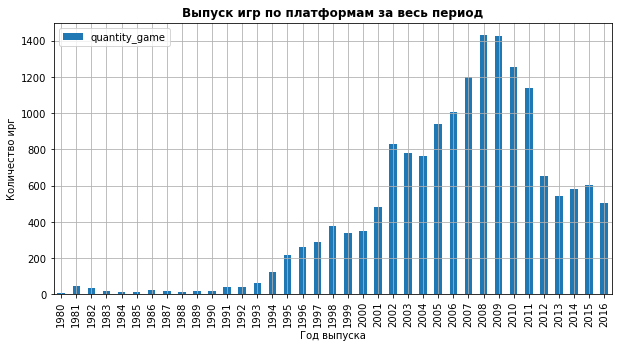

,year_of_release,quantity_game
29,2008,1429
30,2009,1427
31,2010,1255
28,2007,1198
32,2011,1137
27,2006,1008
26,2005,941
23,2002,830
24,2003,779
25,2004,764


In [23]:
quantity = df.pivot_table(
    index='year_of_release', 
    values='name', 
    aggfunc='count').reset_index() # посмотрим сколько игр выпускалось в каждый год

quantity = quantity.rename(columns={
    quantity.columns[1]:'quantity_game' # переименуем столбец с количеством выпущенных игр
})

(quantity
 .query('year_of_release != -1')
 #.sort_values('quantity_game', ascending=False)
 .plot(x='year_of_release', y='quantity_game', kind='bar', grid=True, figsize=(10, 5))
); 

plt.title('Выпуск игр по платформам за весь период', fontweight="bold")
plt.xlabel('Год выпуска')
plt.ylabel('Количество ирг')
plt.show()

display(quantity.query('year_of_release != -1').sort_values('quantity_game', ascending=False)) 

***Вывод по выпуску игр в год***

Посчитав количество игр, выпущенных в каждый год, можно сказать, что пик выпуска пришёлся на 2008 и 2009 годы. В текущем 2016 году, на момент выгрузки данных, вышло 502 игры, что меньше 2015 почти на 100 игр и сравнимо с 2001 годом. 

## Продажи по платформам

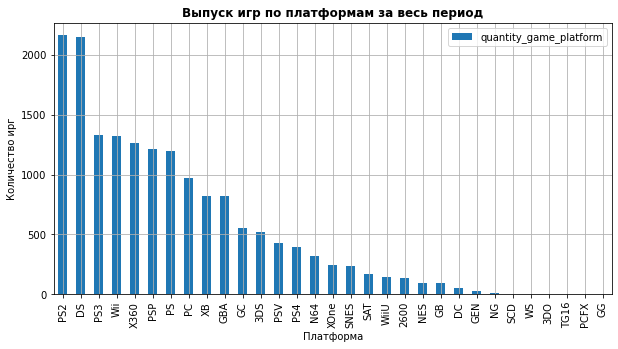

,platform,quantity_game_platform
16,PS2,2161
4,DS,2151
17,PS3,1331
26,Wii,1320
28,X360,1262
19,PSP,1209
15,PS,1197
13,PC,974
29,XB,824
6,GBA,822


In [24]:
platforms = df.pivot_table(
    index='platform', 
    values='name', 
    aggfunc='count').reset_index() # посмотрим сколько игр вышло на каждой платформе

platforms = platforms.rename(columns={
    platforms.columns[1]:'quantity_game_platform' 
})

(platforms
 .sort_values('quantity_game_platform', ascending=False)                
 .plot(x='platform', y='quantity_game_platform', kind='bar', grid=True, figsize=(10, 5))
); 

plt.title('Выпуск игр по платформам за весь период', fontweight="bold")
plt.xlabel('Платформа')
plt.ylabel('Количество ирг')
plt.show()

display(platforms.sort_values('quantity_game_platform', ascending=False)) 

In [25]:
top_platforms = platforms.sort_values('quantity_game_platform', ascending=False)[:10] # выберем 10 самых результативных платформ
top_platforms = top_platforms['platform'].reset_index(drop=True)
top_platforms.tolist()

['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA']

PS2


,year_of_release,name
0,2002,280
1,2004,261
2,2005,261
3,2006,261
4,2003,258
5,2007,214
6,2008,191
7,2001,185
8,2009,96
9,2000,82


DS


,year_of_release,name
0,2008,493
1,2009,403
2,2007,376
3,2010,323
4,2006,201
5,2011,153
6,2005,118
7,2004,23
8,2012,23
9,2013,8


PS3


,year_of_release,name
0,2011,215
1,2010,181
2,2009,162
3,2012,148
4,2008,138
5,2013,126
6,2014,108
7,2007,90
8,2015,73
9,2016,38


Wii


,year_of_release,name
0,2009,325
1,2008,282
2,2010,253
3,2007,185
4,2011,143
5,2006,44
6,2012,31
7,2013,12
8,2014,6
9,2015,4


X360


,year_of_release,name
0,2011,207
1,2010,182
2,2009,172
3,2008,146
4,2007,124
5,2012,106
6,2006,93
7,2013,75
8,2014,63
9,2015,35


PSP


,year_of_release,name
0,2006,189
1,2010,188
2,2009,162
3,2011,139
4,2007,133
5,2012,106
6,2008,101
7,2005,95
8,2013,54
9,2004,15


PS


,year_of_release,name
0,1998,248
1,1999,200
2,1997,188
3,1996,164
4,2000,160
5,1995,99
6,2001,91
7,2002,20
8,1994,17
9,2003,3


PC


,year_of_release,name
0,2011,139
1,2009,107
2,2010,90
3,2008,76
4,2007,62
5,2012,61
6,2016,54
7,2006,52
8,2015,50
9,2014,47


XB


,year_of_release,name
0,2003,190
1,2005,180
2,2004,177
3,2002,159
4,2006,62
5,2001,33
6,2007,3
7,2000,1
8,2008,1


GBA


,year_of_release,name
0,2002,198
1,2004,175
2,2003,150
3,2005,135
4,2001,107
5,2006,39
6,2007,6
7,2000,1


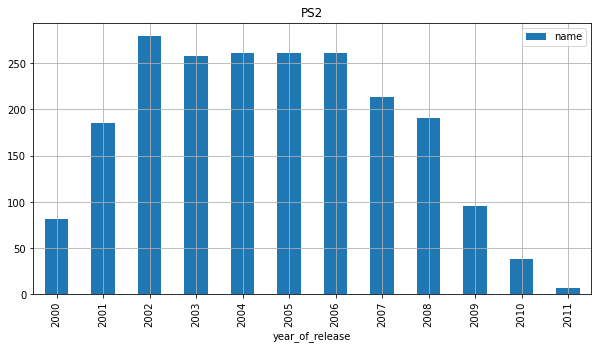

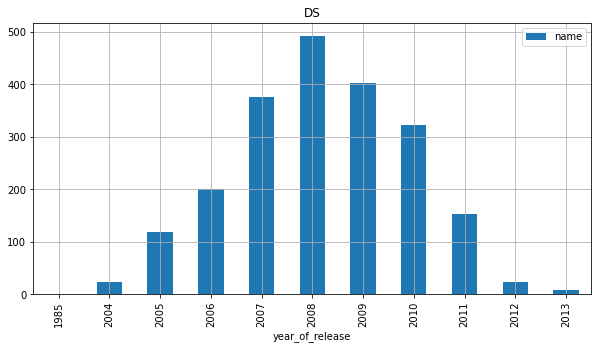

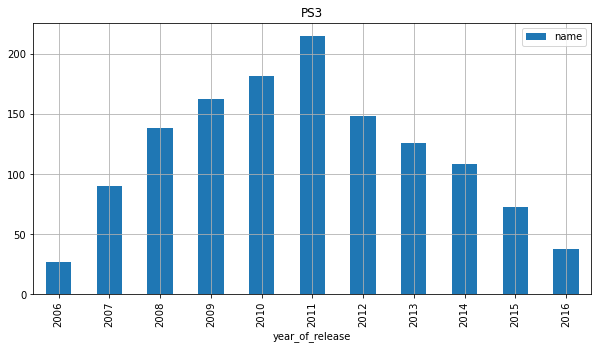

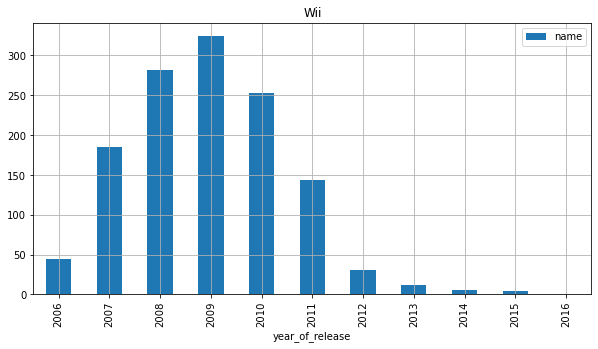

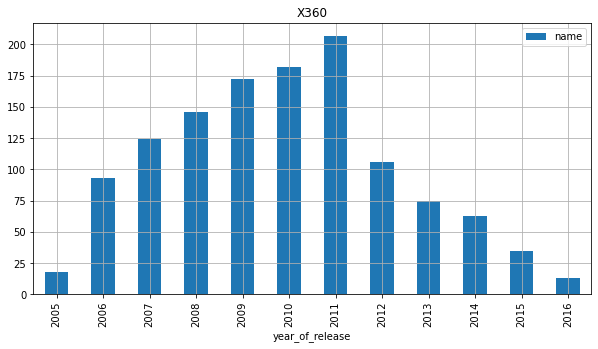

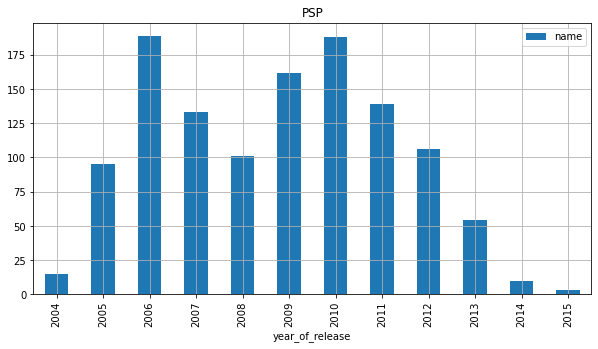

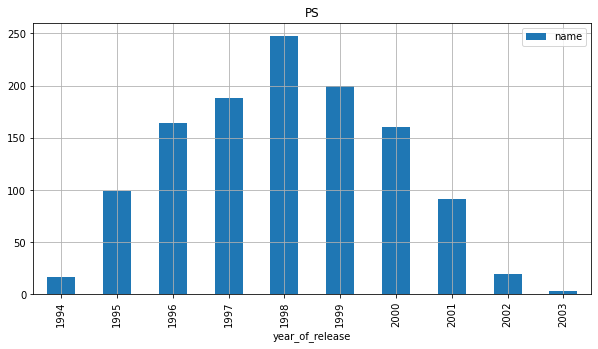

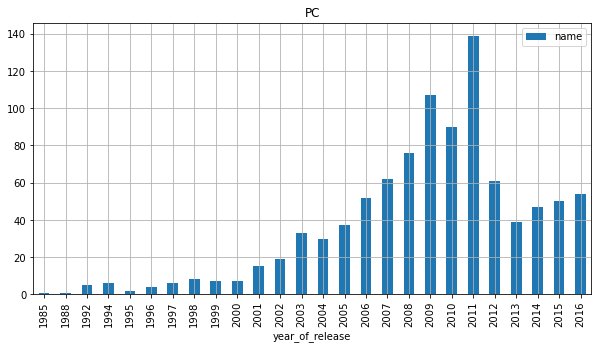

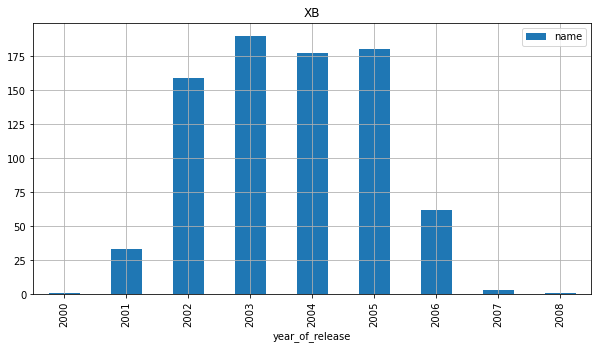

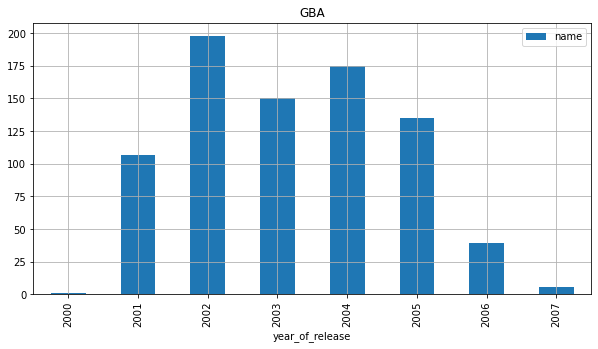

In [26]:
# для десятки лучших построим распределение по годам
for value in top_platforms:
    print(value)
    display(df
     .query('platform == @value & year_of_release != -1')
     .pivot_table(index=['year_of_release'], values=['name'], aggfunc='count')
     .sort_values('name', ascending=False)
     .reset_index()        
)


    (df
     .query('platform == @value & year_of_release != -1')
     .pivot_table(index=['year_of_release'], values=['name'], aggfunc='count')
     .sort_values('year_of_release', ascending=True)
     .reset_index()
     .plot(x='year_of_release', y='name', kind='bar', grid=True, figsize=(10, 5))
)
    plt.title(value)
  

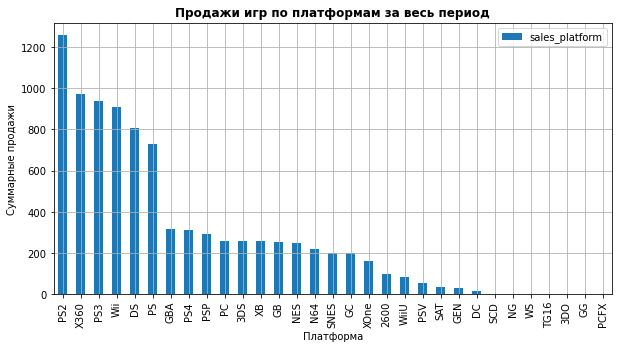

,platform,sales_platform
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


In [27]:
platforms_sales = df.pivot_table(
    index='platform', 
    values='sales', 
    aggfunc='sum').reset_index() # посмотрим сколько проданных копий на каждой платформе

platforms_sales = platforms_sales.rename(columns={
    platforms_sales.columns[1]:'sales_platform' 
})

(platforms_sales
 .sort_values('sales_platform', ascending=False)                
 .plot(x='platform', y='sales_platform', kind='bar', grid=True, figsize=(10, 5))
); 

plt.title('Продажи игр по платформам за весь период', fontweight="bold")
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.show()

display(platforms_sales.sort_values('sales_platform', ascending=False)) 

In [28]:
top_platforms_sales = platforms_sales.sort_values('sales_platform', ascending=False)[:10] # выберем 10 самых результативных платформ
top_platforms_sales = top_platforms_sales['platform'].reset_index(drop=True)
top_platforms_sales.tolist()

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']

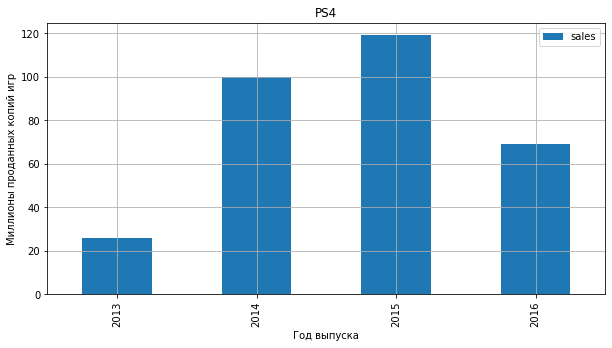

In [29]:
(df
     .query('platform == "PS4" & year_of_release != -1')
     .pivot_table(index=['year_of_release'], values=['sales'], aggfunc='sum')
     .sort_values('year_of_release', ascending=True)
     .reset_index()
     .plot(x='year_of_release', y='sales', kind='bar', grid=True, figsize=(10, 5))
)
plt.title("PS4")
plt.xlabel('Год выпуска')
plt.ylabel('Миллионы проданных копий игр') # Платформа PS4 и количество продаж по годам
plt.show()

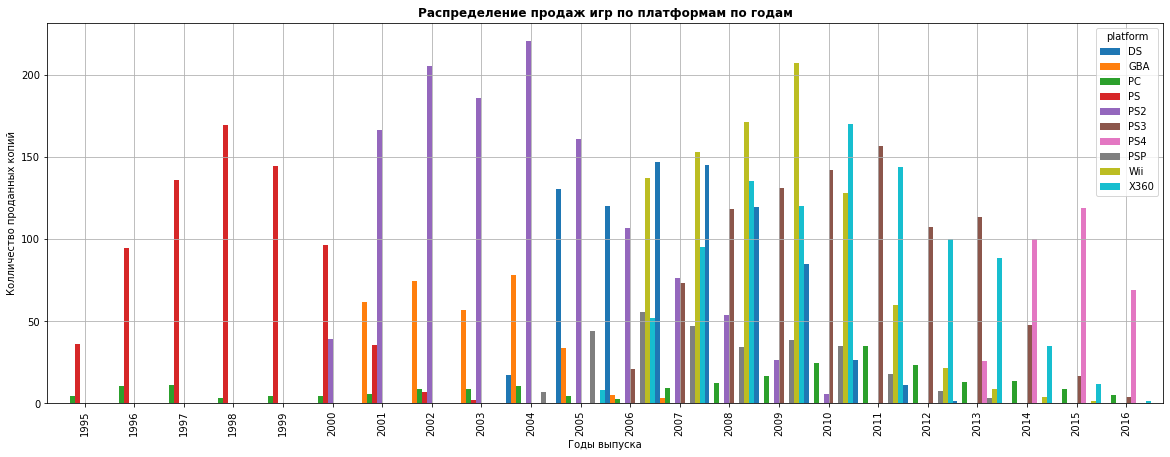

In [30]:
# распределение продаж по годам по платформам
(df
     .query('platform == @top_platforms_sales.tolist() & year_of_release != -1 & year_of_release > 1994')
     .pivot_table(index=['year_of_release'], columns='platform', values=['sales'], aggfunc='sum')
     .sort_values('year_of_release', ascending=True)
     .reset_index()
     .plot(x='year_of_release', y='sales', kind='bar', grid=True, figsize=(20, 7), width=1)
)

plt.title('Распределение продаж игр по платформам по годам', fontweight="bold")
plt.xlabel('Годы выпуска')
plt.ylabel('Колличество проданных копий')
plt.show()

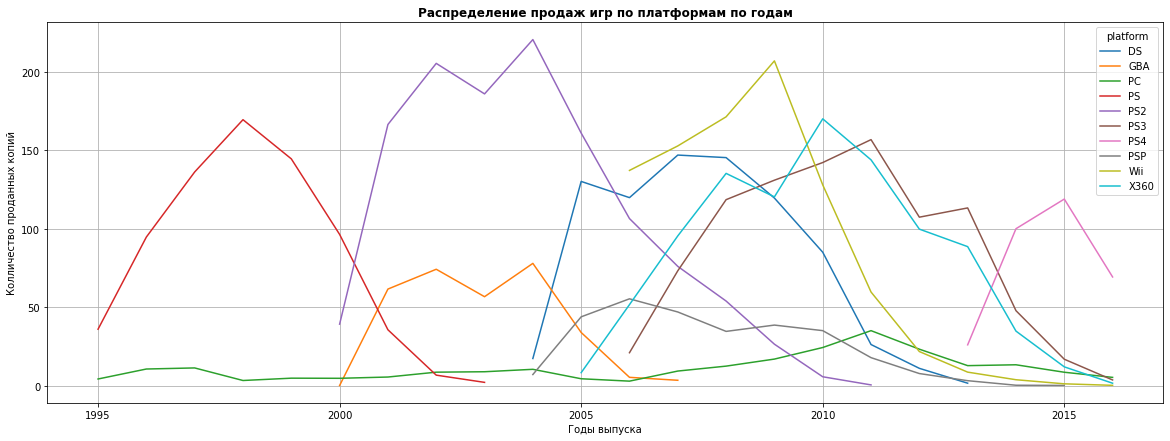

In [31]:
# распределение продаж по годам по платформам
(df
     .query('platform == @top_platforms_sales.tolist() & year_of_release != -1 & year_of_release > 1994')
     .pivot_table(index=['year_of_release'], columns='platform', values=['sales'], aggfunc='sum')
     .sort_values('year_of_release', ascending=True)
     .reset_index()
     .plot(x='year_of_release', y='sales', kind='line', grid=True, figsize=(20, 7))
)

plt.title('Распределение продаж игр по платформам по годам', fontweight="bold")
plt.xlabel('Годы выпуска')
plt.ylabel('Колличество проданных копий')
plt.show()

***Вывод по продажам игр по платформам***

За весь период данный в исходной таблице, больше всего было выпущенно игр на платформах PS2 и DS. Их ближайшие конкуренты PS3 и Wii отстали почти на 40%.

Судя по имеющимся данным, по количеству выпущенных игр лучшими платформами стали:

- PS2 - первые игры на этой платформе вышли в 2000 году, пика выпуска платформа достигла в 2002. После 2011 года игр не было. Оработала 12 лет. 
- DS - первые игры на этой платформе вышли в 2004 году, пика выпуска платформа достигла в 2008. После 2013 года игр не было. Оработала 10 лет.
- PS3 - первые игры на этой платформе вышли в 2006 году, пика выпуска платформа достигла в 2011. На 2016 год вышло 38 игр. Оработала 11 лет и продолжает работу.
- Wii - первые игры на этой платформе вышли в 2006 году, пика выпуска платформа достигла в 2009. На 2016 год вышла всего 1 игра. Оработала 11 лет и продолжает работу, но будет ли что-то в 2017 под вопросом.
- X360 - первые игры на этой платформе вышли в 2005 году, пика выпуска платформа достигла в 2011. На 2016 год вышло 13 игр. Оработала 7 лет и продолжает работу.
- PSP - первые игры на этой платформе вышли в 2004 году, первый пик выпуска платформа достигла в 2006 году, дальше был небольшой спад и снова всплеск в 2010. Последние игры вышли в 2015. Оработала 12 лет.
- PS - первые игры на этой платформе вышли в 1994 году, пика выпуска платформа достигла в 1998. Последние игры вышли в 2003. Оработала 10 лет.
- PC - первые игры на этой платформе вышли в 1985 году, пика выпуска платформа достигла в 2011. На 2016 год вышло 54 игры. Оработала 32 года и продолжает работу.
- XB - первые игры на этой платформе вышли в 2000 году, пика выпуска платформа достигла в 2003. Последние игры вышли в 2008. Оработала 9 лет.
- GBA - первые игры на этой платформе вышли в 2000 году, пика выпуска платформа достигла в 2002. Последние игры вышли в 2007. Оработала 8 лет.

Если не брать в расчёт платформу PC, мастодонта разработки компьютерных игр, то можно сказать, что срок жизни платформы 10 лет.

По количеству проданных копий 9 из 10 лучшими стали все теже платформы, которые были лучшими по количеству выпущенных игр. В этом списке появилась платформа PS4, которая не попала в лучшие по количеству выпущенных игр. Можно сказать, что это новая платформа. Первые игры на ней вышли в 2013 году и их количество растёт.

***Вывод по продажам игр по платформам НОВЫЙ***

За весь период данный в исходной таблице, больше всего было продано игр выпущенных на платформах PS2 и X360. Их ближайшие конкуренты PS3 и Wii. 

Десятка лучших по продажам выглядит так:

-   PS2	    1255.77
- 	X360	971.42
-	PS3	    939.65
-	Wii	    907.51
-	DS	    806.12
-	PS	    730.86
-	GBA	    317.85
-	PS4	    314.14
-	PSP	    294.05
-	PC	    259.52

## Выбор актуального периода

In [32]:
df = df.query('year_of_release >= 2014') # уберём данные до 2014 года
display(df.info(), df['platform'].unique(), df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     1689 non-null   float64
 9   user_score       1689 non-null   float64
 10  rating           940 non-null    object 
 11  sales            1689 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 164.9+ KB


None

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,NaN,7.98


In [33]:
test_list = df.query('year_of_release == 2016')['platform'].unique()
test_list # список платформ на которых выходили игры в 2016 году

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [34]:
df = df.query('platform in @test_list').reset_index(drop=True) # создадим новый фрейм изходя из списка 
display(df.info(), df['platform'].unique(), df.head())
print(f'На 2016 год игры выходят на', len(df['platform'].unique()), 'платформах.')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1676 non-null   object 
 1   platform         1676 non-null   object 
 2   year_of_release  1676 non-null   int32  
 3   genre            1676 non-null   object 
 4   na_sales         1676 non-null   float64
 5   eu_sales         1676 non-null   float64
 6   jp_sales         1676 non-null   float64
 7   other_sales      1676 non-null   float64
 8   critic_score     1676 non-null   float64
 9   user_score       1676 non-null   float64
 10  rating           940 non-null    object 
 11  sales            1676 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 150.7+ KB


None

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV'],
      dtype=object)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,NaN,14.63
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
2,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,NaN,11.68
3,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
4,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,NaN,7.98


На 2016 год игры выходят на 9 платформах.


Исходя из полученных выше результатов, можно сказать, что рассматривать временной период больше 10 лет не стоит. Выбрав актуальный период с 2007 года включительно, мы видим, что в данные попали платформы, на которых уже не выпускают игры. Стоит их убрать. 

На 2016 год игры выходят на 9 платформах. В таблице осталось 1676 строк.

In [35]:
display(df.groupby('platform')['sales'].sum().sort_values(ascending=False)) 

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.05
PSV      22.40
Wii       5.07
Name: sales, dtype: float64

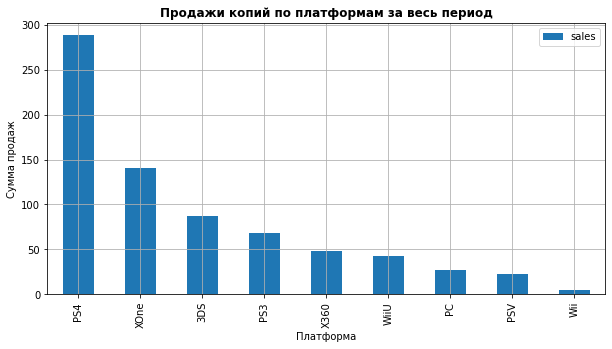

In [36]:
(df
 .pivot_table(index=['platform'], values=['sales'], aggfunc='sum')
 .sort_values('sales', ascending=False)                
 .plot(kind='bar', grid=True, figsize=(10, 5))
);  # посмотрим на продажи копий по платформам за весь период

plt.title('Продажи копий по платформам за весь период', fontweight="bold")
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

По количеству проданных с 2014 года копий лидируют:

- PS4 - 288.15 миллионов 
- XOne - 140.36 миллионов 
- 3DS - 86.68 миллионов

PS4


,year_of_release,sales
0,2016,69.25
1,2015,118.90
2,2014,100.00


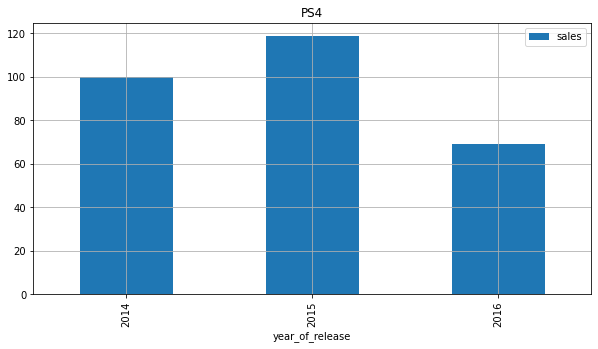

3DS


,year_of_release,sales
0,2016,15.14
1,2015,27.78
2,2014,43.76


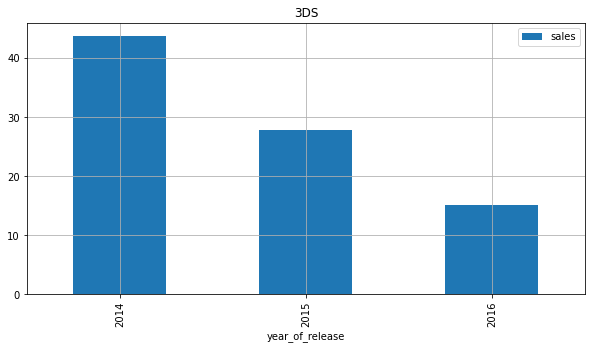

XOne


,year_of_release,sales
0,2016,26.15
1,2015,60.14
2,2014,54.07


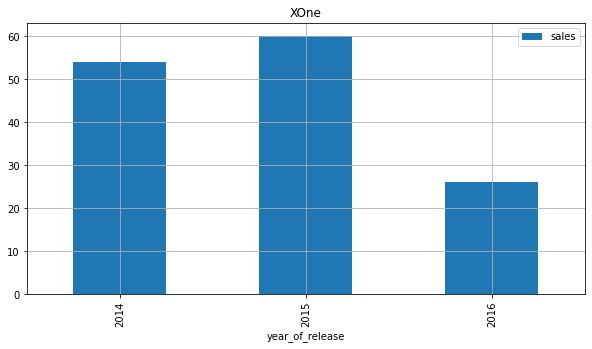

WiiU


,year_of_release,sales
0,2016,4.60
1,2015,16.35
2,2014,22.03


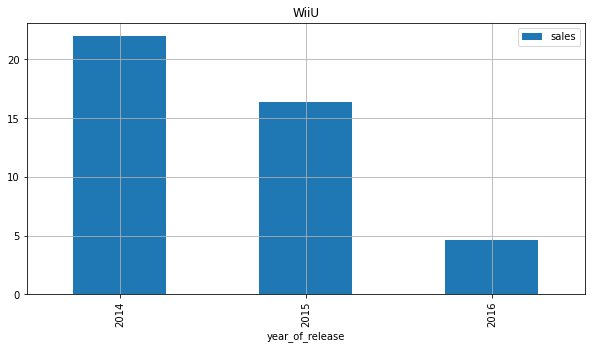

PS3


,year_of_release,sales
0,2016,3.60
1,2015,16.82
2,2014,47.76


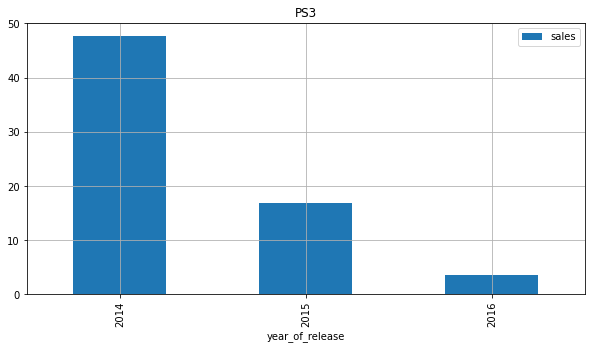

PC


,year_of_release,sales
0,2016,5.25
1,2015,8.52
2,2014,13.28


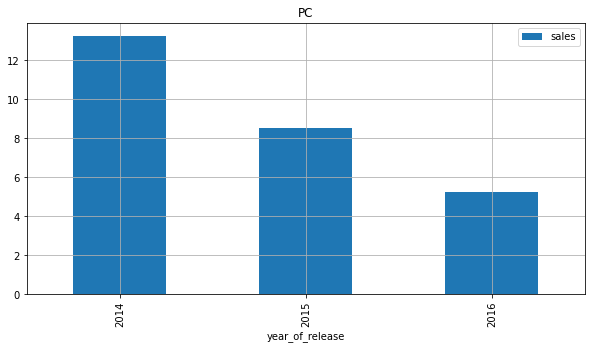

X360


,year_of_release,sales
0,2016,1.52
1,2015,11.96
2,2014,34.74


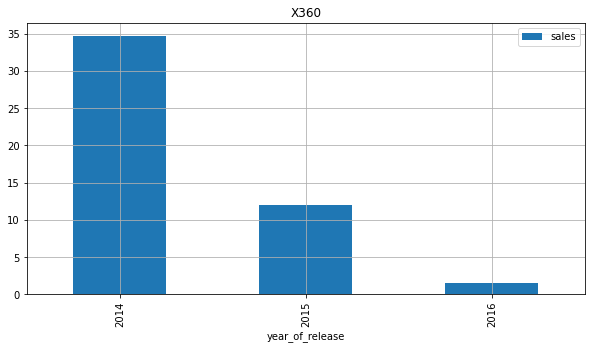

PSV


,year_of_release,sales
0,2016,4.25
1,2015,6.25
2,2014,11.90


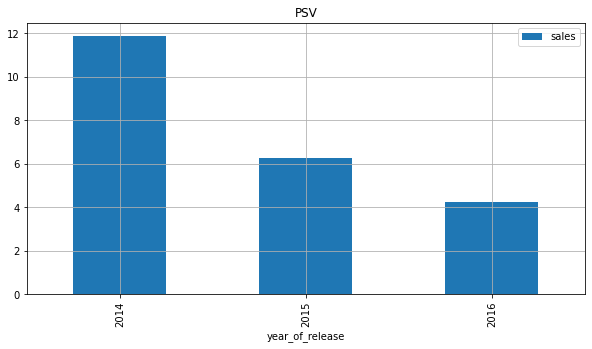

Wii


,year_of_release,sales
0,2016,0.18
1,2015,1.14
2,2014,3.75


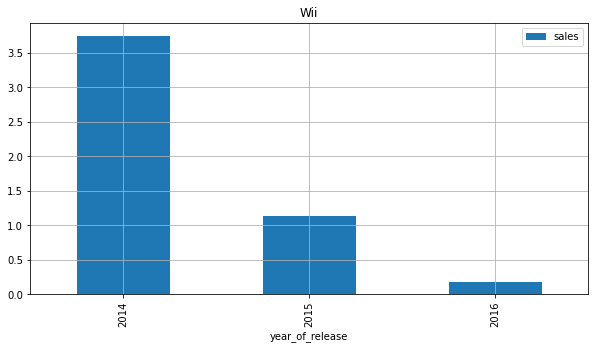

In [37]:
# построим распределение по годам
for value in test_list:
    print(value)
    display(df
     .query('platform == @value')
     .pivot_table(index=['year_of_release'], values=['sales'], aggfunc='sum')
     .sort_values('year_of_release', ascending=False)
     .reset_index()        
)


    (df
     .query('platform == @value')
     .pivot_table(index=['year_of_release'], values=['sales'], aggfunc='sum')
     .sort_values('year_of_release', ascending=True)
     .reset_index()
     .plot(x='year_of_release', y='sales', kind='bar', grid=True, figsize=(10, 5))
)
    plt.title(value)
    plt.show()
  

Построив распределение продаж по годам видим, что число проданных копий в 2016 году снизилось для всех платформ. Если сравнить показатели 2016 года, то безусловным лидером будет платформа PS4 с 69.25 млн. проданных копий, за ней XOne - 26.15 млн. и 3DS - 15.14 млн.
Устойчивое снижение продаж показывают платформы: Wii, X360 и PC.

Можно предположить, что потенциально прибыльные платформы PS4, XOne и 3DS. 

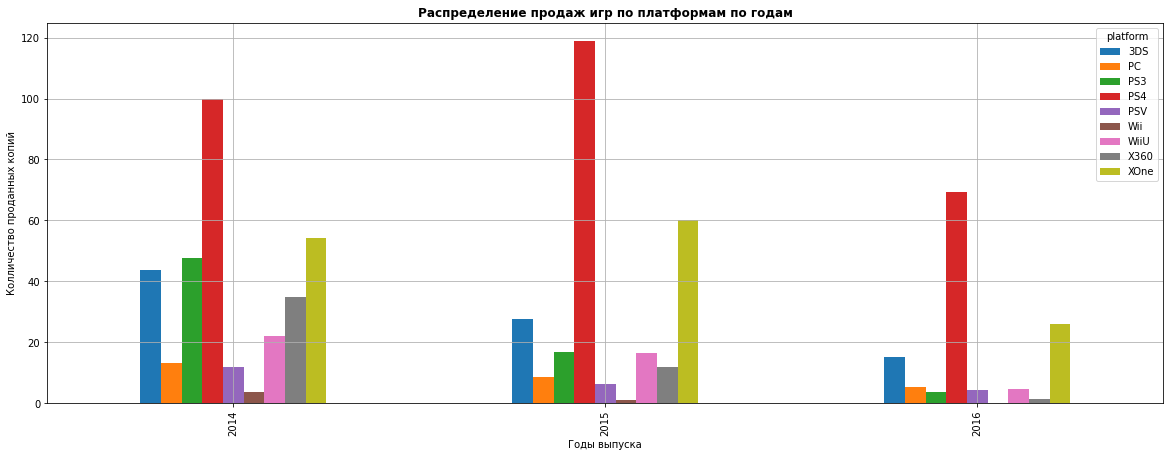

In [38]:
(df
     .query('year_of_release != -1')
     .pivot_table(index=['year_of_release'], columns='platform', values=['sales'], aggfunc='sum')
     .sort_values('year_of_release', ascending=True)
     .reset_index()
     .plot(x='year_of_release', y='sales', kind='bar', grid=True, figsize=(20, 7))
)
x = np.arange(2014, 2016)
year_width = 0.5
plt.bar(x - year_width / 4, height=1, width=year_width / 2, align='center')
plt.bar(x + year_width / 4, height=1, width=year_width / 2, align='center')

plt.title('Распределение продаж игр по платформам по годам', fontweight="bold")
plt.xlabel('Годы выпуска')
plt.ylabel('Колличество проданных копий')
plt.show()

In [39]:
for value in test_list:   
    print(value)
    display(df.query('platform == @value').describe().T)

PS4


,count,mean,std,min,25%,50%,75%,max
year_of_release,376.0,2015.236702,0.762336,2014.00,2015.0000,2015.000,2016.0000,2016.00
na_sales,376.0,0.262261,0.583439,0.00,0.0000,0.050,0.2400,6.03
eu_sales,376.0,0.345851,0.815480,0.00,0.0000,0.070,0.2800,6.31
jp_sales,376.0,0.039947,0.067048,0.00,0.0000,0.015,0.0500,0.49
other_sales,376.0,0.118298,0.256506,0.00,0.0000,0.020,0.1025,2.38
critic_score,376.0,45.486702,36.202539,0.00,0.0000,64.000,76.2500,97.00
user_score,376.0,4.394681,3.461287,0.00,0.0000,6.100,7.5250,9.20
sales,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63


3DS


,count,mean,std,min,25%,50%,75%,max
year_of_release,212.0,2014.839623,0.755853,2014.00,2014.00,2015.000,2015.0000,2016.00
na_sales,212.0,0.106792,0.440719,0.00,0.00,0.000,0.0500,4.35
eu_sales,212.0,0.076038,0.295478,0.00,0.00,0.000,0.0400,3.49
jp_sales,212.0,0.208679,0.529456,0.00,0.01,0.055,0.1325,3.18
other_sales,212.0,0.017358,0.070365,0.00,0.00,0.000,0.0100,0.74
critic_score,212.0,16.594340,30.209467,0.00,0.00,0.000,0.0000,90.00
user_score,212.0,1.851887,3.227158,0.00,0.00,0.000,2.6500,9.00
sales,212.0,0.408868,1.188368,0.01,0.03,0.090,0.2500,11.68


XOne


,count,mean,std,min,25%,50%,75%,max
year_of_release,228.0,2015.114035,0.799325,2014.00,2014.00,2015.000,2016.0000,2016.00
na_sales,228.0,0.356447,0.634756,0.00,0.03,0.100,0.3525,4.59
eu_sales,228.0,0.202851,0.371972,0.00,0.02,0.070,0.2100,2.19
jp_sales,228.0,0.001404,0.005289,0.00,0.00,0.000,0.0000,0.04
other_sales,228.0,0.054912,0.095065,0.00,0.00,0.020,0.0525,0.68
critic_score,228.0,50.166667,35.949283,0.00,0.00,67.000,80.0000,97.00
user_score,228.0,4.772368,3.178144,0.00,0.00,6.100,7.2250,9.20
sales,228.0,0.615614,1.046513,0.01,0.05,0.205,0.6325,7.39


WiiU


,count,mean,std,min,25%,50%,75%,max
year_of_release,73.0,2014.767123,0.754994,2014.00,2014.00,2015.00,2015.00,2016.00
na_sales,73.0,0.265205,0.519632,0.00,0.01,0.09,0.28,3.15
eu_sales,73.0,0.180137,0.328407,0.00,0.01,0.06,0.21,2.15
jp_sales,73.0,0.100137,0.261712,0.00,0.00,0.01,0.09,1.46
other_sales,73.0,0.043288,0.082547,0.00,0.00,0.02,0.05,0.51
critic_score,73.0,41.931507,36.845522,0.00,0.00,58.00,75.00,91.00
user_score,73.0,4.660274,3.576573,0.00,0.00,6.50,7.80,9.10
sales,73.0,0.588767,1.161467,0.01,0.05,0.19,0.57,7.09


PS3


,count,mean,std,min,25%,50%,75%,max
year_of_release,219.0,2014.680365,0.753054,2014.00,2014.00,2015.00,2015.000,2016.00
na_sales,219.0,0.100685,0.227749,0.00,0.00,0.02,0.100,2.03
eu_sales,219.0,0.116621,0.334091,0.00,0.00,0.01,0.100,3.02
jp_sales,219.0,0.051233,0.079516,0.00,0.00,0.02,0.060,0.49
other_sales,219.0,0.042785,0.101313,0.00,0.00,0.01,0.040,0.87
critic_score,219.0,10.940639,25.313287,0.00,0.00,0.00,0.000,91.00
user_score,219.0,2.691324,3.242276,0.00,0.00,0.00,6.250,8.60
sales,219.0,0.311324,0.633059,0.01,0.04,0.11,0.325,5.27


PC


,count,mean,std,min,25%,50%,75%,max
year_of_release,151.0,2015.046358,0.819250,2014.00,2014.00,2015.00,2016.000,2016.00
na_sales,151.0,0.047881,0.111813,0.00,0.00,0.00,0.055,1.00
eu_sales,151.0,0.119007,0.205325,0.00,0.02,0.05,0.130,1.82
jp_sales,151.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00
other_sales,151.0,0.012252,0.025038,0.00,0.00,0.00,0.020,0.23
critic_score,151.0,58.549669,33.382568,0.00,55.00,73.00,81.000,96.00
user_score,151.0,5.088742,2.921770,0.00,3.55,6.00,7.350,9.30
sales,151.0,0.179139,0.329359,0.01,0.02,0.06,0.200,3.05


X360


,count,mean,std,min,25%,50%,75%,max
year_of_release,111.0,2014.549550,0.697251,2014.00,2014.00,2014.00,2015.000,2016.00
na_sales,111.0,0.254955,0.396220,0.00,0.03,0.10,0.315,2.77
eu_sales,111.0,0.139550,0.240157,0.00,0.02,0.05,0.155,1.92
jp_sales,111.0,0.000721,0.002927,0.00,0.00,0.00,0.000,0.02
other_sales,111.0,0.039189,0.057637,0.00,0.01,0.02,0.045,0.40
critic_score,111.0,14.927928,28.047917,0.00,0.00,0.00,0.000,91.00
user_score,111.0,4.315315,2.918567,0.00,0.35,5.10,6.850,8.70
sales,111.0,0.434414,0.628967,0.01,0.07,0.18,0.505,4.28


PSV


,count,mean,std,min,25%,50%,75%,max
year_of_release,295.0,2014.949153,0.791617,2014.00,2014.00,2015.00,2016.00,2016.00
na_sales,295.0,0.008542,0.027791,0.00,0.00,0.00,0.00,0.32
eu_sales,295.0,0.011966,0.048636,0.00,0.00,0.00,0.00,0.64
jp_sales,295.0,0.049288,0.074271,0.00,0.01,0.03,0.06,0.90
other_sales,295.0,0.006136,0.020586,0.00,0.00,0.00,0.00,0.24
critic_score,295.0,13.227119,28.186803,0.00,0.00,0.00,0.00,93.00
user_score,295.0,1.894576,3.354260,0.00,0.00,0.00,0.00,9.30
sales,295.0,0.075932,0.141591,0.01,0.02,0.04,0.09,1.96


Wii


,count,mean,std,min,25%,50%,75%,max
year_of_release,11.0,2014.545455,0.687552,2014.00,2014.000,2014.00,2015.000,2016.00
na_sales,11.0,0.189091,0.308398,0.00,0.000,0.04,0.280,0.99
eu_sales,11.0,0.235455,0.268118,0.01,0.035,0.12,0.415,0.85
jp_sales,11.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
other_sales,11.0,0.036364,0.053902,0.00,0.000,0.01,0.060,0.17
critic_score,11.0,0.000000,0.000000,0.00,0.000,0.00,0.000,0.00
user_score,11.0,1.154545,2.727403,0.00,0.000,0.00,0.000,8.40
sales,11.0,0.460909,0.625451,0.01,0.035,0.18,0.755,2.01


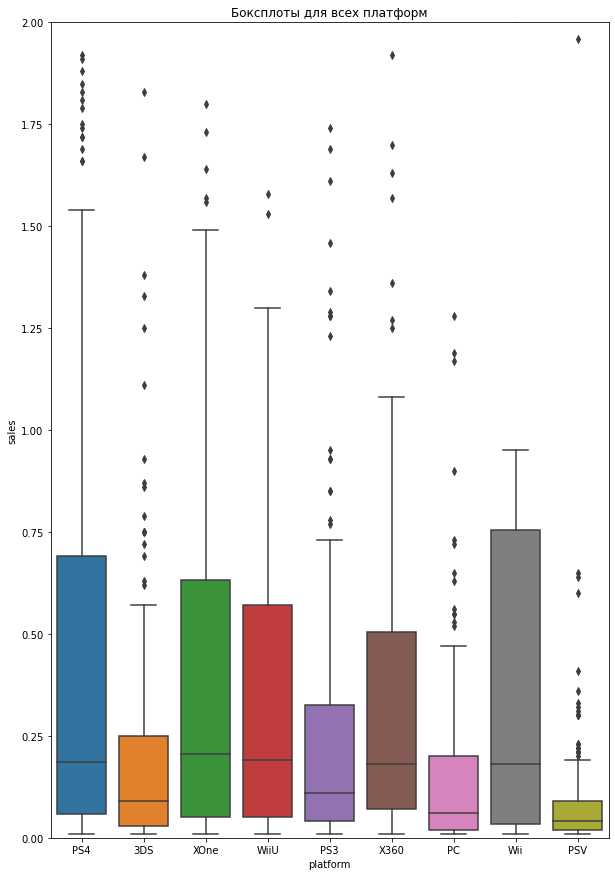

In [40]:
plt.figure(figsize = (10,15))
(sns.boxplot(data = df, y ='sales' , x='platform')).set(title='Боксплоты для всех платформ');
plt.ylim(0, 2);

Построив диагарамму размаха для продаж в разбивке по платформам, можно сказать что :

- PS4 - медиана 0.185 млн. копий, при среднем 0.766 млн. и Q3 0.6900 млн.
- 3DS - медиана 0.205 млн. копий, при среднем 0.409 млн. и Q3 0.25 млн.
- XOne - медиана 0.02 млн. копий, при среднем 0.615 млн. и Q3 0.6325 млн.
- WiiU - медиана 0.19 млн. копий, при среднем 0.588 млн. и Q3 0.57 млн.
- PS3 - медиана 0.11 млн. копий, при среднем 0.311 млн. и Q3 0.325 млн.
- PC - медиана 0.06 млн. копий, при среднем 0.179 млн. и Q3 0.20 млн.
- X360 - медиана 0.18 млн. копий, при среднем 0.434 млн. и Q3 0.505 млн.
- PSV - медиана 0.04 млн. копий, при среднем 0.075 млн. и Q3 0.09 млн.
- Wii - медиана 0.18 млн. копий, при среднем 0.460 млн. и Q3 0.755 млн.

Платформы 3DS c медианой в 205000 копий и PS4 в 185000 копий продолжают подтвержать свои позиции.

## Влияние отзывов критиков и пользователей на продажи

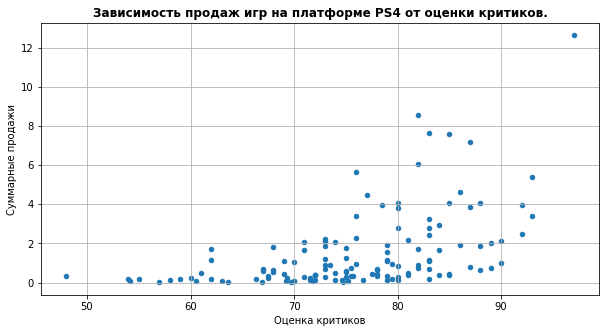

,critic_score,na_sales,eu_sales,jp_sales,other_sales,sales
critic_score,1.000000,0.411638,0.340268,0.379041,0.404645,0.402661
na_sales,0.411638,1.000000,0.713758,0.567900,0.916017,0.892938
eu_sales,0.340268,0.713758,1.000000,0.542153,0.934652,0.951882
jp_sales,0.379041,0.567900,0.542153,1.000000,0.598968,0.619781
other_sales,0.404645,0.916017,0.934652,0.598968,1.000000,0.998058
sales,0.402661,0.892938,0.951882,0.619781,0.998058,1.000000


In [41]:
(df                                                  # посмотрим на влияние оценки критиков на продажи игр платформы PS4
     .query('platform == "PS4" & critic_score != 0')
     .pivot_table(index=['sales'], values=['critic_score'])
     .sort_values('sales', ascending=True)
     .reset_index()
     .plot(x='critic_score', y='sales', kind='scatter', grid=True, figsize=(10, 5))
)
plt.title('Зависимость продаж игр на платформе PS4 от оценки критиков.', fontweight="bold")
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')
plt.show()

# посторим корреляцию между отзывами критиков и всеми продажами
df.query('platform == "PS4" & critic_score != 0')[['critic_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales']].corr()

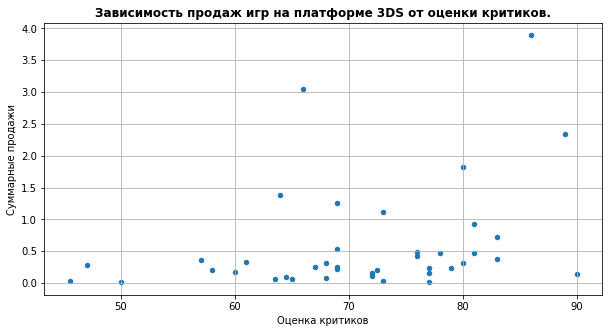

,critic_score,na_sales,eu_sales,jp_sales,other_sales,sales
critic_score,1.000000,0.363441,0.178086,0.279149,0.330872,0.314117
na_sales,0.363441,1.000000,0.792526,0.614775,0.979316,0.858955
eu_sales,0.178086,0.792526,1.000000,0.691739,0.890657,0.887145
jp_sales,0.279149,0.614775,0.691739,1.000000,0.663856,0.915852
other_sales,0.330872,0.979316,0.890657,0.663856,1.000000,0.904378
sales,0.314117,0.858955,0.887145,0.915852,0.904378,1.000000


In [42]:
(df                                                  # посмотрим на влияние оценки критиков на продажи игр платформы 3DS
     .query('platform == "3DS" & critic_score != 0')
     .pivot_table(index=['sales'], values=['critic_score'])
     .sort_values('sales', ascending=True)
     .reset_index()
     .plot(x='critic_score', y='sales', kind='scatter', grid=True, figsize=(10, 5))
)
plt.title('Зависимость продаж игр на платформе 3DS от оценки критиков.', fontweight="bold")
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')
plt.show()

# посторим корреляцию между отзывами критиков и всеми продажами
df.query('platform == "3DS" & critic_score != 0')[['critic_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales']].corr()

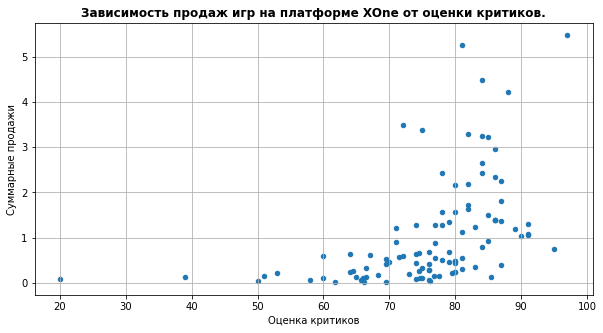

,critic_score,na_sales,eu_sales,jp_sales,other_sales,sales
critic_score,1.000000,0.401137,0.385121,0.207366,0.425689,0.428677
na_sales,0.401137,1.000000,0.681861,0.408690,0.982565,0.956163
eu_sales,0.385121,0.681861,1.000000,0.384649,0.803619,0.866130
jp_sales,0.207366,0.408690,0.384649,1.000000,0.426790,0.437768
other_sales,0.425689,0.982565,0.803619,0.426790,1.000000,0.993084
sales,0.428677,0.956163,0.866130,0.437768,0.993084,1.000000


In [43]:
(df                                                  # посмотрим на влияние оценки критиков на продажи игр платформы XOne
     .query('platform == "XOne" & critic_score != 0')
     .pivot_table(index=['sales'], values=['critic_score'])
     .sort_values('sales', ascending=True)
     .reset_index()
     .plot(x='critic_score', y='sales', kind='scatter', grid=True, figsize=(10, 5))
)
plt.title('Зависимость продаж игр на платформе XOne от оценки критиков.', fontweight="bold")
plt.xlabel('Оценка критиков')
plt.ylabel('Суммарные продажи')
plt.show()

# посторим корреляцию между отзывами критиков и всеми продажами
df.query('platform == "XOne" & critic_score != 0')[['critic_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales']].corr()

In [44]:
#  посмотрим на продажи игр с оценкой критиков больше 90
df.query('critic_score > 90').sort_values(by='critic_score', ascending=False) 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
1,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
14,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
152,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17
217,Metal Gear Solid V: The Phantom Pain,XOne,2015,Action,0.41,0.26,0.01,0.07,95.0,7.3,M,0.75
236,The Witcher 3: Wild Hunt,PC,2015,Role-Playing,0.21,0.46,0.00,0.05,93.0,9.3,M,0.72
15,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39
40,Metal Gear Solid V: The Phantom Pain,PS4,2015,Action,1.09,1.36,0.49,0.48,93.0,8.2,M,3.42
705,Odin Sphere: Leifthrasir,PSV,2016,Role-Playing,0.02,0.02,0.09,0.01,93.0,7.9,T,0.14
32,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97
61,Bloodborne,PS4,2015,Action,1.03,0.81,0.26,0.38,92.0,8.6,M,2.48


In [45]:
df.query('critic_score > 90').pivot_table(index='critic_score', values='sales').reset_index()

,critic_score,sales
0,91.0,0.7330
1,92.0,3.2250
2,93.0,2.4175
3,95.0,0.7500
4,96.0,1.1700
5,97.0,9.0450


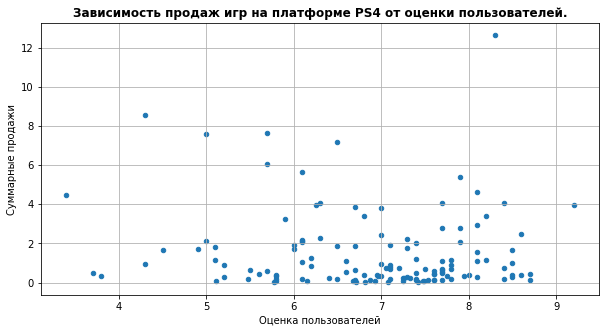

,user_score,na_sales,eu_sales,jp_sales,other_sales,sales
user_score,1.000000,-0.016156,-0.064199,0.179384,-0.044166,-0.040132
na_sales,-0.016156,1.000000,0.715010,0.570745,0.916462,0.893513
eu_sales,-0.064199,0.715010,1.000000,0.544431,0.934892,0.952040
jp_sales,0.179384,0.570745,0.544431,1.000000,0.601524,0.622182
other_sales,-0.044166,0.916462,0.934892,0.601524,1.000000,0.998069
sales,-0.040132,0.893513,0.952040,0.622182,0.998069,1.000000


In [46]:
(df                                                  # посмотрим на влияние оценки пользователей на продажи игр платформы PS4
     .query('platform == "PS4" & user_score != 0')
     .pivot_table(index=['sales'], values=['user_score'])
     .sort_values('sales', ascending=True)
     .reset_index()
     .plot(x='user_score', y='sales', kind='scatter', grid=True, figsize=(10, 5))
)
plt.title('Зависимость продаж игр на платформе PS4 от оценки пользователей.', fontweight="bold")
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

# посторим корреляцию между отзывами пользователей и всеми продажами
df.query('platform == "PS4" & user_score != 0 & user_score != -1')[['user_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales']].corr()

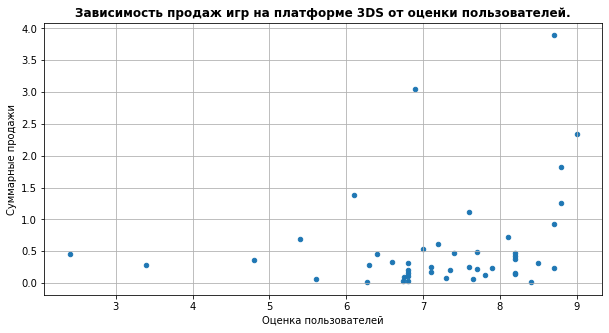

,user_score,na_sales,eu_sales,jp_sales,other_sales,sales
user_score,1.000000,0.254592,0.014621,0.235903,0.203967,0.215193
na_sales,0.254592,1.000000,0.774947,0.594796,0.976957,0.853978
eu_sales,0.014621,0.774947,1.000000,0.639203,0.883183,0.865158
jp_sales,0.235903,0.594796,0.639203,1.000000,0.636744,0.906481
other_sales,0.203967,0.976957,0.883183,0.636744,1.000000,0.898433
sales,0.215193,0.853978,0.865158,0.906481,0.898433,1.000000


In [47]:
(df                                                  # посмотрим на влияние оценки пользователей на продажи игр платформы 3DS
     .query('platform == "3DS" & user_score != 0')
     .pivot_table(index=['sales'], values=['user_score'])
     .sort_values('sales', ascending=True)
     .reset_index()
     .plot(x='user_score', y='sales', kind='scatter', grid=True, figsize=(10, 5))
)
plt.title('Зависимость продаж игр на платформе 3DS от оценки пользователей.', fontweight="bold")
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

# посторим корреляцию между отзывами пользователей и всеми продажами
df.query('platform == "3DS" & user_score != 0 & user_score != -1')[['user_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales']].corr()

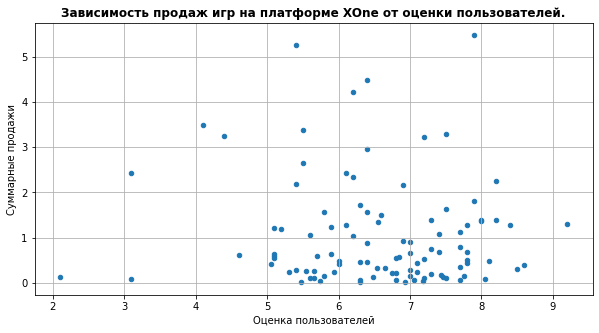

,user_score,na_sales,eu_sales,jp_sales,other_sales,sales
user_score,1.000000,-0.068053,-0.061547,0.062259,-0.069776,-0.070384
na_sales,-0.068053,1.000000,0.689348,0.413724,0.982988,0.957287
eu_sales,-0.061547,0.689348,1.000000,0.390002,0.808332,0.869323
jp_sales,0.062259,0.413724,0.390002,1.000000,0.431566,0.442373
other_sales,-0.069776,0.982988,0.808332,0.431566,1.000000,0.993261
sales,-0.070384,0.957287,0.869323,0.442373,0.993261,1.000000


In [48]:
(df                                                  # посмотрим на влияние оценки пользователей на продажи игр платформы XOne
     .query('platform == "XOne" & user_score != 0')
     .pivot_table(index=['sales'], values=['user_score'])
     .sort_values('sales', ascending=True)
     .reset_index()
     .plot(x='user_score', y='sales', kind='scatter', grid=True, figsize=(10, 5))
)
plt.title('Зависимость продаж игр на платформе XOne от оценки пользователей.', fontweight="bold")
plt.xlabel('Оценка пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

# посторим корреляцию между отзывами пользователей и всеми продажами
df.query('platform == "XOne" & user_score != 0 & user_score != -1')[['user_score', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'sales']].corr()

In [49]:
#  посмотрим на продажи игр с оценкой пользователей больше от 7 до 10
df.query('7 < user_score < 10').pivot_table(index='user_score', values='sales').reset_index()

,user_score,sales
0,7.1,0.307750
1,7.2,0.515000
2,7.3,0.449655
3,7.4,0.345000
4,7.5,0.408333
5,7.6,0.413077
6,7.7,0.603600
7,7.8,0.309394
8,7.9,0.875600
9,8.0,0.296129


In [50]:
df.query('user_score > 9').sort_values(by='user_score', ascending=False) #  посмотрим на продажи игр с оценкой пользователей от 9

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales
236,The Witcher 3: Wild Hunt,PC,2015,Role-Playing,0.21,0.46,0.00,0.05,93.0,9.3,M,0.72
865,Steins;Gate 0,PSV,2015,Adventure,0.00,0.03,0.05,0.01,86.0,9.3,M,0.09
32,The Witcher 3: Wild Hunt,PS4,2015,Role-Playing,1.02,2.13,0.23,0.59,92.0,9.2,M,3.97
130,The Witcher 3: Wild Hunt,XOne,2015,Role-Playing,0.69,0.50,0.00,0.11,91.0,9.2,M,1.30
11,Mario Kart 8,WiiU,2014,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E,7.09


Для того, чтобы посмотреть, как влияют на продажи отзывы критиков и покупателей возьмём данные по платформе PS4. Игры выпущенные на ней лидируют в выборке по объёмам продаж. 

Посторив график зависимости и посчитав корреляцию между продажами и оценкой критиков можно сказать, что такая зависимость есть и она достаточно очевидна. 

При этом есть интересный момент, что для игр на платформе  PS4 корреляция продаж в Европе несколько ниже, чем в целом по миру и в отдельно взятой Японии, Северной Америке и остальной частью мира. 

Для платформы 3DS  характерна тоже не высокая корреляция с оценкой критиков, причём для Европы она заметно меньше остальных продаж.

Для платформы XOne, как и для двух других платформ, зависимость от оценки критиков прослеживается, но есть отличие - зависимость уиеньшается для продаж в Японии.

Для вссех остальных платформ это утверждение можно считать верным, но нужно учитывать, что высокая оценка критика сама по себе не пропорциональна количеству продаж. Например игры получившие оценку критиков 97 баллов продавались от 0.07 до 12.67 млн. копий.

Проведя аналогичный анализ зависимости продаж от оценки покупателей - для платформы PS4 в целом видим отрицательную корреляцию, причём очень слабую везде кроме Японии. Там корреляция положительная, но тоже слабая. 

Для платфориы 3DS - зависимость от оценки пользователей не высокая 21%, а для Европы вообще только 1%.

Платформа XOne показывает отрицательную в общем корреляцию.

## Распределение игр по жанрам

<function matplotlib.pyplot.show(close=None, block=None)>

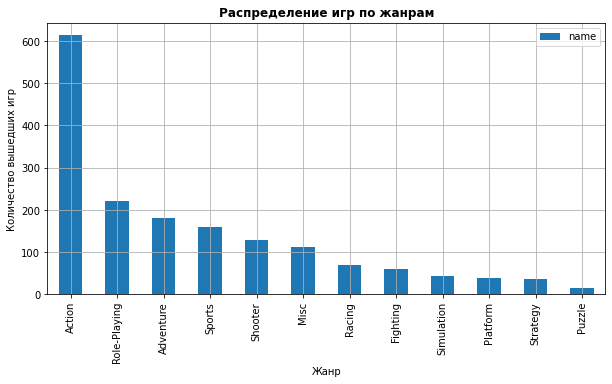

In [51]:
(df
 .pivot_table(index='genre', values='name', aggfunc='count')
 .reset_index()
 .sort_values('name', ascending=False)
 .plot(x='genre', y='name', kind='bar', grid=True, figsize=(10, 5))
 )

plt.title('Распределение игр по жанрам', fontweight="bold")
plt.xlabel('Жанр')
plt.ylabel('Количество вышедших игр')
plt.show

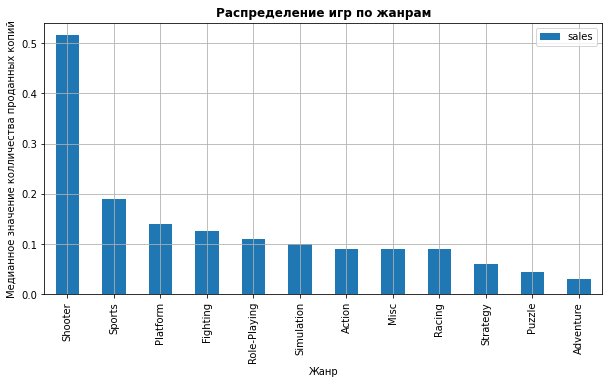

In [52]:
(df
 .pivot_table(index='genre', values='sales', aggfunc='median')
 .reset_index()
 .sort_values('sales', ascending=False)
 .plot(x='genre', y='sales', kind='bar', grid=True, figsize=(10, 5))
 )

plt.title('Распределение игр по жанрам', fontweight="bold")
plt.xlabel('Жанр')
plt.ylabel('Медианное значение колличества проданных копий')
plt.show;

In [53]:
df['genre'].unique()

array(['Shooter', 'Action', 'Role-Playing', 'Sports', 'Fighting',
       'Racing', 'Misc', 'Platform', 'Simulation', 'Adventure', 'Puzzle',
       'Strategy'], dtype=object)

Посторив распределение игр по жанрам мжно сказать, что по количеству выпущенных игр лидирут жанр Action. 

По медианному значению проданных копий в лидерах Shooter, с большим отставанием дальше Sports и Platform. Лидирующий в разработке и выпуске Action только на 7 месте. Последний в списке Adventure.

# Портрет пользователя для каждого региона.

## Самые популярные платформы

Продажи по платформам в Северной Америке


,platform,na_sales,ratio_na
3,PS4,98.61,38.996322
8,XOne,81.27,32.139044
7,X360,28.30,11.191521
0,3DS,22.64,8.953217
2,PS3,22.05,8.719896


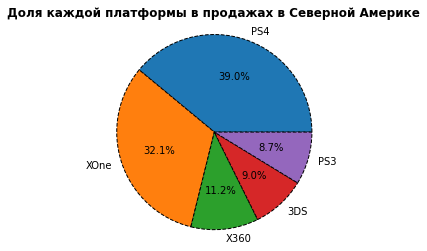

In [54]:
# найдём самые популярные платформы 
# в Северной Америке
platform_na = (df
 .query('na_sales > 0')
 .pivot_table(index='platform', values=['na_sales'], aggfunc='sum')
 .reset_index()
 .sort_values('na_sales', ascending=False)[:5]
)
platform_na['ratio_na'] = (platform_na['na_sales'] / sum(platform_na['na_sales'])) * 100
print('Продажи по платформам в Северной Америке')
display(platform_na)

vals = platform_na['na_sales']
labels = platform_na['platform']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
plt.title('Доля каждой платформы в продажах в Северной Америке', fontweight="bold")
plt.show()


Продажи по платформам в Европе


,platform,eu_sales,ratio_eu
3,PS4,130.04,55.120380
8,XOne,46.25,19.604103
2,PS3,25.54,10.825704
1,PC,17.97,7.616989
0,3DS,16.12,6.832825


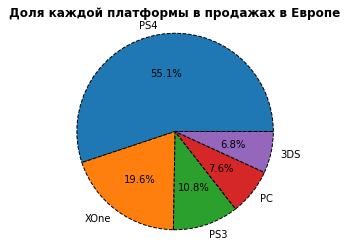

In [55]:
# найдём самые популярные платформы 
# в Европе
platform_eu = (df
 .query('eu_sales > 0')
 .pivot_table(index='platform', values=['eu_sales'], aggfunc='sum')
 .reset_index()
 .sort_values('eu_sales', ascending=False)[:5]
)
platform_eu['ratio_eu'] = (platform_eu['eu_sales'] / sum(platform_eu['eu_sales'])) * 100
print('Продажи по платформам в Европе')
display(platform_eu)

vals = platform_eu['eu_sales']
labels = platform_eu['platform']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
plt.title('Доля каждой платформы в продажах в Европе', fontweight="bold")
plt.show()


Продажи по платформам в Японии


,platform,jp_sales,ratio_jp
0,3DS,44.24,47.915087
2,PS4,15.02,16.267735
3,PSV,14.54,15.747861
1,PS3,11.22,12.152063
4,WiiU,7.31,7.917253


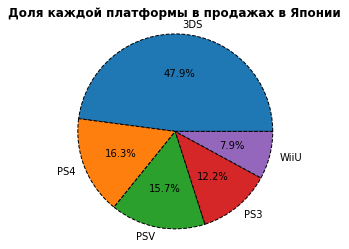

In [56]:
# найдём самые популярные платформы 
# в Японии
platform_jp = (df
 .query('jp_sales > 0')
 .pivot_table(index='platform', values=['jp_sales'], aggfunc='sum')
 .reset_index()
 .sort_values('jp_sales', ascending=False)[:5]
)
platform_jp['ratio_jp'] = (platform_jp['jp_sales'] / sum(platform_jp['jp_sales'])) * 100
print('Продажи по платформам в Японии')
display(platform_jp)

vals = platform_jp['jp_sales']
labels = platform_jp['platform']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
plt.title('Доля каждой платформы в продажах в Японии', fontweight="bold")
plt.show()


In [57]:
data = (platform_na
        .merge(platform_eu, left_on='platform', right_on = 'platform', how='outer', suffixes=('_na', '_eu'))
        .merge(platform_jp, left_on='platform', right_on = 'platform', how='outer', suffixes=('_jp', '_jp'))
        .rename(columns={'sales': 'sales_jp'})
       )
data

,platform,na_sales,ratio_na,eu_sales,ratio_eu,jp_sales,ratio_jp
0,PS4,98.61,38.996322,130.04,55.120380,15.02,16.267735
1,XOne,81.27,32.139044,46.25,19.604103,NaN,NaN
2,X360,28.30,11.191521,NaN,NaN,NaN,NaN
3,3DS,22.64,8.953217,16.12,6.832825,44.24,47.915087
4,PS3,22.05,8.719896,25.54,10.825704,11.22,12.152063
5,PC,NaN,NaN,17.97,7.616989,NaN,NaN
6,PSV,NaN,NaN,NaN,NaN,14.54,15.747861
7,WiiU,NaN,NaN,NaN,NaN,7.31,7.917253


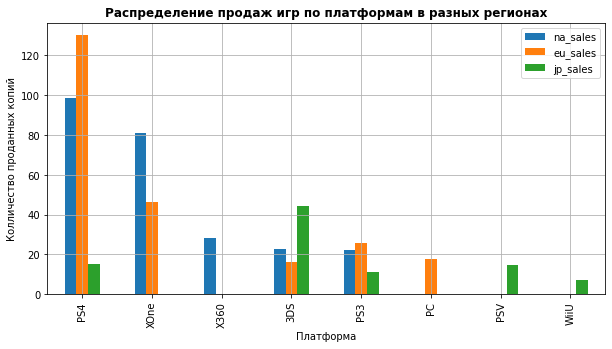

In [58]:
index = np.arange(5)
data[['platform', 'na_sales', 'eu_sales', 'jp_sales']].plot(x= 'platform', kind='bar', grid=True, figsize=(10, 5))

plt.title('Распределение продаж игр по платформам в разных регионах', fontweight="bold")
plt.xlabel('Платформа')
plt.ylabel('Колличество проданных копий')
plt.show()

Не все платформы из тройки перспективных присутствует на рынках в Северной Америке, в Европе и  Японии. Их доли на рынке составили:

- PS4	Северная Америка 39 % Европа 55 %	Япония 16 %
- XOne	Северная Америка 32 % Европа 20 %	Япония 0 %
- 3DS	Северная Америка 9 %  Европа 9 %    Япония 48 %

По популярности:

в Северной Америке
- PS4	39%
- XOne	32%
- X360	11%

в Европе
- PS4	55%
- XOne	20%
- PS3	11%

в Японии
- 3DS	48%
- PS4	16%
- PSV	16%

## Самые популярные жанры

Продажи по жанрам в Европе


,genre,na_sales,ratio_na
8,Shooter,79.02,32.095857
0,Action,72.53,29.459789
10,Sports,46.13,18.736799
7,Role-Playing,33.47,13.594639
3,Misc,15.05,6.112916


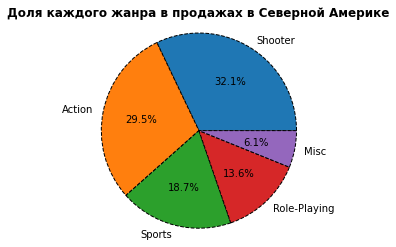

In [59]:
# Найдём самые популярные жанры
# в Северной Америке
platform_na = (df
 .pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .reset_index()
 .sort_values('na_sales', ascending=False)[:5]
)
platform_na['ratio_na'] = (platform_na['na_sales'] / sum(platform_na['na_sales'])) * 100
print('Продажи по жанрам в Европе')
display(platform_na)

vals = platform_na['na_sales']
labels = platform_na['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
plt.title('Доля каждого жанра в продажах в Северной Америке', fontweight="bold")
plt.show()

Продажи по жанрам в Европе


,genre,eu_sales,ratio_eu
0,Action,74.68,32.721378
8,Shooter,65.52,28.707882
10,Sports,45.73,20.036805
7,Role-Playing,28.17,12.342812
6,Racing,14.13,6.191123


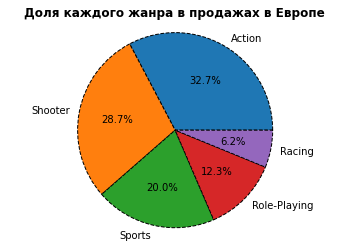

In [60]:
# в Европе
platform_eu = (df
 .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .reset_index()
 .sort_values('eu_sales', ascending=False)[:5]
)
platform_eu['ratio_eu'] = (platform_eu['eu_sales'] / sum(platform_eu['eu_sales'])) * 100
print('Продажи по жанрам в Европе')
display(platform_eu)

vals = platform_eu['eu_sales']
labels = platform_eu['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
plt.title('Доля каждого жанра в продажах в Европе', fontweight="bold")
plt.show()

Продажи по жанрам в Японии


,genre,jp_sales,ratio_jp
7,Role-Playing,31.16,40.274008
0,Action,29.38,37.973375
2,Fighting,6.37,8.233165
3,Misc,5.59,7.225023
8,Shooter,4.87,6.294429


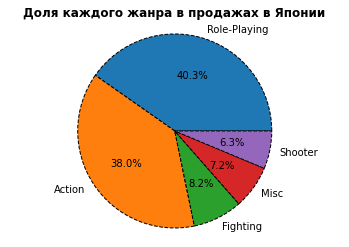

In [61]:
# в Японии
platform_jp = (df
 .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .reset_index()
 .sort_values('jp_sales', ascending=False)[:5]
)
platform_jp['ratio_jp'] = (platform_jp['jp_sales'] / sum(platform_jp['jp_sales'])) * 100
print('Продажи по жанрам в Японии')
display(platform_jp)

vals = platform_jp['jp_sales']
labels = platform_jp['genre']
fig, ax = plt.subplots()
ax.pie(vals, labels=labels, autopct='%1.1f%%', wedgeprops={'lw':1, 'ls':'--','edgecolor':"k"})
ax.axis("equal")
plt.title('Доля каждого жанра в продажах в Японии', fontweight="bold")
plt.show()

***Вывод по самым популярным жанрам***

Тройка лидеров по жанрам:

в Северной Америке:

- Shooter	32%
- Action	30%
- Sports	19%

в Европе:

- Action	33%
- Shooter	29%
- Sports	20%

в Японии:

- Role-Playing	40%
- Action	    38%
- Fighting	     8%


Жанр Action хорошо продаваемый во всех регионах. Везде его доля 30% и больше. Следующий по популярности в Америке и Европе Shooter. Его предпочитают около 30% игороков. На третьем месте также в Америке и Европе Sports с показателем 30 и 29%, соответственно. 

У японских пользователей другие предпочтения Action и Fighting на втором и третьем месте по популярности.

In [62]:
df['rating'].unique()

array([nan, 'M', 'E', 'T', 'E10+'], dtype=object)

In [63]:
df['rating'] = df['rating'].fillna('Не определён')

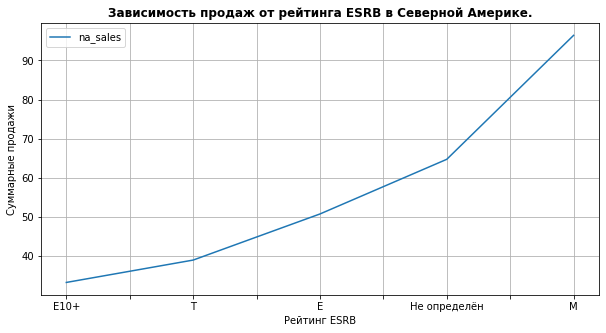

,rating,na_sales
0,M,96.42
1,Не определён,64.72
2,E,50.74
3,T,38.95
4,E10+,33.23


In [64]:
# посмотрим на влияние рейтинга ESRB на продажи 
# в Северной Америке
(df                                                  
     .pivot_table(index=['rating'], values=['na_sales'], aggfunc='sum')
     .sort_values('na_sales', ascending=True)
     .reset_index()
     .plot(x='rating', y='na_sales', style='-', grid=True, figsize=(10, 5))
)
plt.title('Зависимость продаж от рейтинга ESRB в Северной Америке.', fontweight="bold")
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи')
plt.show()

display(df                                                  
     .pivot_table(index=['rating'], values=['na_sales'], aggfunc='sum')
     .sort_values('na_sales', ascending=False)
     .reset_index())

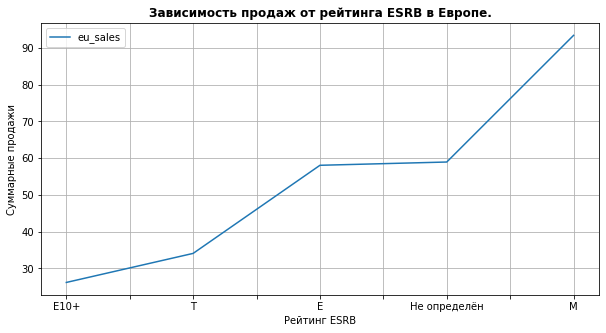

,rating,eu_sales
0,M,93.44
1,Не определён,58.95
2,E,58.06
3,T,34.07
4,E10+,26.16


In [65]:
# в Европе
(df                                                  
     .pivot_table(index=['rating'], values=['eu_sales'], aggfunc='sum')
     .sort_values('eu_sales', ascending=True)
     .reset_index()
     .plot(x='rating', y='eu_sales', style='-', grid=True, figsize=(10, 5))
)
plt.title('Зависимость продаж от рейтинга ESRB в Европе.', fontweight="bold")
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи')
plt.show()

display(df                                                  
     .pivot_table(index=['rating'], values=['eu_sales'], aggfunc='sum')
     .sort_values('eu_sales', ascending=False)
     .reset_index())

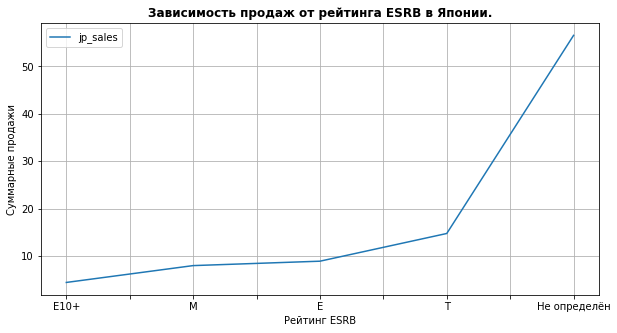

,rating,jp_sales
0,Не определён,56.54
1,T,14.78
2,E,8.94
3,M,8.01
4,E10+,4.46


In [66]:
# в Японии
(df                                                  
     .pivot_table(index=['rating'], values=['jp_sales'], aggfunc='sum')
     .sort_values('jp_sales', ascending=True)
     .reset_index()
     .plot(x='rating', y='jp_sales', style='-', grid=True, figsize=(10, 5))
)
plt.title('Зависимость продаж от рейтинга ESRB в Японии.', fontweight="bold")
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи')
plt.show()

display(df                                                  
     .pivot_table(index=['rating'], values=['jp_sales'], aggfunc='sum')
     .sort_values('jp_sales', ascending=False)
     .reset_index())

***Вывод по влиянию рейтинга на продажи игр***

Рейтинг ESRB влияет на продажу игр. 

в Северной Америке
- M	            96.42 млн. копий
- Не определён	64.72 млн. копий
- E	            50.74 млн. копий

в Еврорпе
- M	            93.44 млн. копий
- Не определён	58.95 млн. копий
- E	            58.06 млн. копий

в Японии
- Не определён	56.54 млн. копий
- T	            14.78 млн. копий
- E	             8.94 млн. копий

В Северной Америке и Европе продажи игр с рейтингом М самые высокие, а игры без рейтига занимают вторую позицию.
При этом японские пользователи предпочитают покупать игры без рейтига ESRB. Любопытно, что третья позиция во всех регионах у игр с рейтингом Е.

# Проверка гипотез.

## Проверим первую гипотезу:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Сформулируем нулевую гипотезу H₀: средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы РС. 

Исходя из H₀ формулируем альтернативную гипотезу H₁: средний пользовательский рейтинг платформы Xbox One не равен среднему пользовательскому рейтингу платформы РС. Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используем метод: scipy.stats.ttest_ind (array1, array2,equal_var). Параметр equal_var = False, т.к. выборки разные по размерам.
Критический уровень статистической значимости зададим 5%.

In [67]:
df['platform'].unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV'],
      dtype=object)

In [68]:
user_score_mean_XOne = df.query('user_score != 0 & platform == "XOne"')['user_score'] # пользовательские рейтинги XOne
user_score_mean_XOne.describe()

count    165.000000
mean       6.594545
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [69]:
user_score_mean_PC = df.query('user_score != 0 & platform == "PC"')['user_score'] # пользовательские рейтинги PC
user_score_mean_PC.describe()

count    122.000000
mean       6.298361
std        1.703278
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

In [70]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    user_score_mean_XOne, 
    user_score_mean_PC,
    equal_var = False
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 

p-значение:  0.11601398086668832
Не получилось отвергнуть нулевую гипотезу.


Не получилось отвергнуть нулевую гипотезу. Уровень значимости больше заданного уровня статистической значимости. Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы РС. 

## Проверим вторую гипотезу:
- Средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем нулевую гипотезу H₀: средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports. 

Исходя из H₀ формулируем альтернативную гипотезу H₁: средний пользовательский рейтинг жанра Action не равен среднему пользовательскому рейтингу жанра Sports. Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны.

Для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам используем метод: scipy.stats.ttest_ind (array1, array2,equal_var). Параметр equal_var = False, т.к. выборки разные по размерам.
Критический уровень статистической значимости зададим 5%.

In [71]:
user_score_mean_Action = df.query('user_score != 0 & genre == "Action"')['user_score'] # пользовательские рейтинги Action
user_score_mean_Action.describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [72]:
user_score_mean_Sports = df.query('user_score != 0 & genre == "Sports"')['user_score'] # пользовательские рейтинги Sports
user_score_mean_Sports.describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

In [73]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    user_score_mean_Action, 
    user_score_mean_Sports,
    equal_var = False
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.') 

p-значение:  1.1825550382644557e-14
Отвергаем нулевую гипотезу.


Нулевая гипотеза не подтвердилась. Уровень значимости сильно меньше заданного уровня статистической значимости. Нулевая гипотеза отвергается в пользу альтернативной - Средние пользовательские рейтинги жанров Action и Sports разные.

# Общий вывод

Проанализировав полученные данные можно сказать, что:

- потенциально прибыльные платформы PS4, XOne и 3DS (На платформах PS4 и XOne начали выходить игры в 2013 году, а платформа 3DS на рынке с 2011 года. Учитывая, что срок жизни платформы около 10 лет, у них есть все шансы создать успешные проекты.) 
- чтобы успешно продаваться игре в Северной Америке или Европе нужно получить рейтинг М. Для Японии характерны большие продажи игр без рейтинга.
- на продажи влияют оценки критиков, но нужно учитывать, что высокая оценка критика сама по себе не пропорциональна количеству продаж.
- на продажи игр влияет так же и оценка пользователей, но в малой стопени.
- по всем регионам хорошо продаются игры в жанре Action. Для Европы и Северной Америки жанры Shooter и Sports также показывают отличные продажи. Для Японии картина другая, кроме  Action большие продажи у ирг в жанрах Role-Playing и Fighting. 
- самые выпускаемые - это иргы в жанре Action

Проверка гипотез:

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые: Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу платформы РС. Уровень значимости больше заданного уровня статистической значимости.
- Средние пользовательские рейтинги жанров Action и Sports разные: Средние пользовательские рейтинги жанров Action и Sports разные. Уровень значимости сильно меньше заданного уровня статистической значимости.

В ходе подготовки данных, до выбора актуального периода было удалено 2 строки. Замен пропусков дефолтными, средними или медианными значенями не произодилось.